In [1]:
import pandas as pd, numpy as np
import warnings 
warnings.filterwarnings('ignore')

import sklearn
import statsmodels.api as sm

In [2]:
# to show all rows and columns !!!
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)

In [3]:
# importing libraries for visualization and plots !!!
import matplotlib.pyplot as plt, seaborn as sns

In [4]:
# reading data and store it in variable named df !!!
df = pd.read_csv(r'C:\Users\Lenovo\Downloads\case study lead scoring\Lead Scoring Assignment\Leads.csv')

In [5]:
df.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened


In [6]:
df.shape

(9240, 37)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [9]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Cleaning the dataframe!!!

In [10]:
# replacing all select value with NaN values !!!!
df = df.replace('Select', np.nan)

In [11]:
# unique values in every columns of dataset !!!
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [12]:
## dropping single value columns!!!!
df.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [13]:
# checking for null values in dataset
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums          

### Drop the columns which contains missing values more than 30% in data !!!

In [14]:
# missing value percentage !!!
100 * df.isnull().sum()/ df.shape[0]

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [15]:
### columns for drop having missing value more than 40% !!! 
columns = ['Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Profile Index', 'Asymmetrique Activity Index',
      'Lead Quality', 'Tags']

# dropping columns which contains null values more than 40 % !!!
### also note here droping column name Prospect ID which is useless for analysis !!!

In [16]:
# dropping columns which contains null values more than 40 %
df.drop(['Prospect ID', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Profile Index', 'Asymmetrique Activity Index',
      'Lead Quality', 'City', 'Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

In [17]:
100 * df.isnull().sum()/ df.shape[0]

Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

# Treatment of missing values in dataset !!!

### Replace np.nan value with 'data not given' to ignore the loss of data !!!

In [18]:
df['Country'] = df['Country'].fillna('data not given')

In [19]:
df['Specialization'] = df['Specialization'].fillna('data not given')

In [20]:
df['What is your current occupation'] = df['What is your current occupation'].fillna('data not given')

In [21]:
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].fillna('data not given')

In [22]:
df['Tags'] = df['Tags'].fillna('data not given')

In [23]:
## define a function for classification of country's data into three categories which are'India', 'data not given', 'others'.!!!

def category(X):
    country = ""
    if X == 'India':
        country = 'India'
    elif X == 'data not given':
        country = 'data not given'
    else:
        country = 'others'
    return country
df['Country'] = df.apply(lambda X: category(X['Country']), axis = 1)
    
    

In [24]:
df.Country.nunique()

3

In [25]:
df.Country.value_counts(normalize = True)* 100

India             70.259740
data not given    26.634199
others             3.106061
Name: Country, dtype: float64

In [26]:
df['Last Activity'].describe()

count             9137
unique              17
top       Email Opened
freq              3437
Name: Last Activity, dtype: object

In [27]:
df['Last Activity'] = df['Last Activity'].fillna('Email Opened')

In [28]:
mean_page_views_per_visit = df['Page Views Per Visit'].mean()
mean_page_views_per_visit

2.3628199494672093

In [29]:
df['Page Views Per Visit'] = df['Page Views Per Visit'].fillna(mean_page_views_per_visit)

In [30]:
df['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [31]:
mean_totalvisits = df['TotalVisits'].mean()
mean_totalvisits

3.445237833681204

In [32]:
df['TotalVisits'] = df['TotalVisits'].fillna(mean_totalvisits)

In [33]:
df['Lead Source'].describe()

count       9204
unique        21
top       Google
freq        2868
Name: Lead Source, dtype: object

In [34]:
df['Lead Source'] = df['Lead Source'].fillna('Google')

In [35]:
100 * df.isnull().sum()/ df.shape[0]

Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

# Univariate analysis !!!

In [36]:
import matplotlib.pyplot as plt, seaborn as sns

In [37]:
list(df.select_dtypes(include = 'object'))

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Tags',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [38]:
list(df.select_dtypes(include = 'int'))

['Lead Number', 'Converted', 'Total Time Spent on Website']

In [39]:
list(df.select_dtypes(include = 'float'))

['TotalVisits', 'Page Views Per Visit']

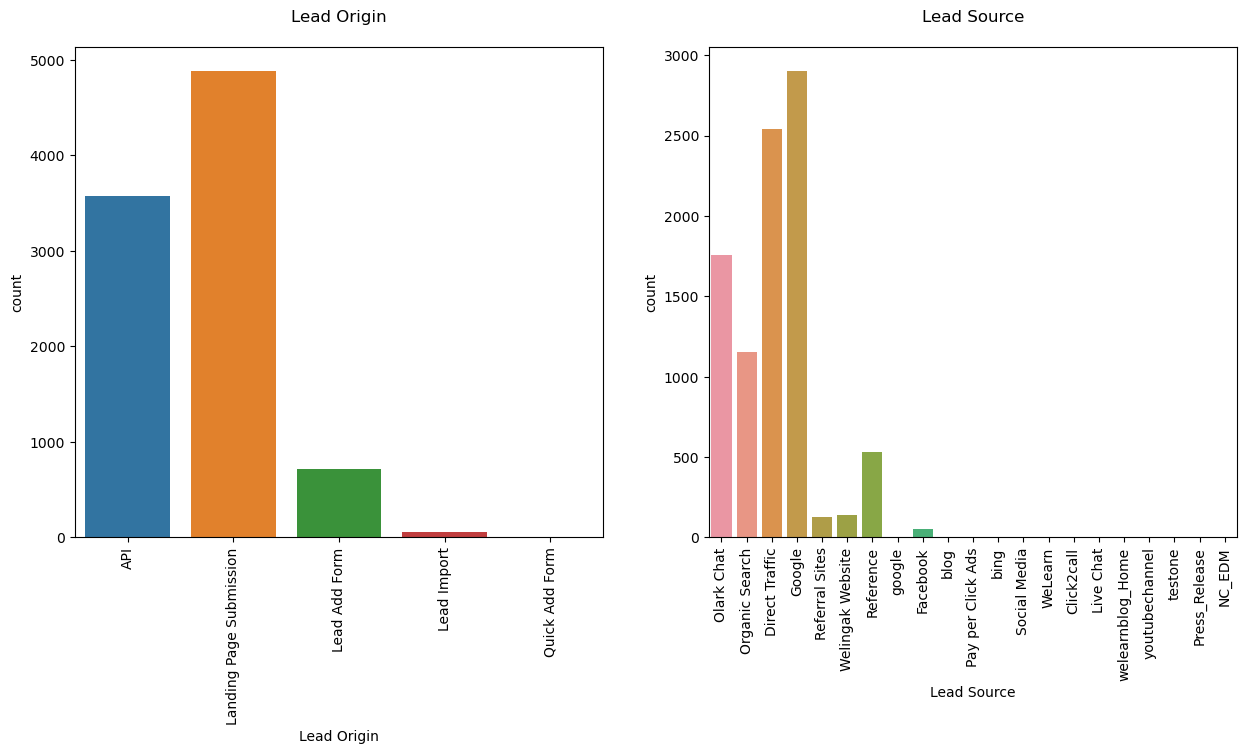

In [40]:
# ploting count plot to analyse :

plt.figure(figsize = (15, 14))
plt.subplot(2,2,1)
sns.countplot(df['Lead Origin'])
plt.xticks(rotation = 90)
plt.title('Lead Origin\n ')

plt.subplot(2,2,2)
sns.countplot(df['Lead Source'])
plt.xticks(rotation = 90)
plt.title('Lead Source\n')

plt.show()

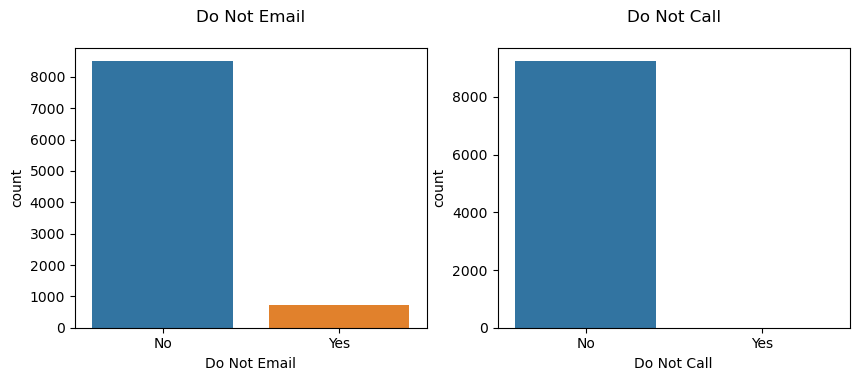

In [41]:
# ploting count plot to analyse :
plt.figure(figsize = (10, 8))
plt.subplot(2,2,1)
sns.countplot(df['Do Not Email'])
plt.title('Do Not Email\n')

plt.subplot(2,2,2)
sns.countplot(df['Do Not Call'])
plt.title('Do Not Call\n')

plt.show()

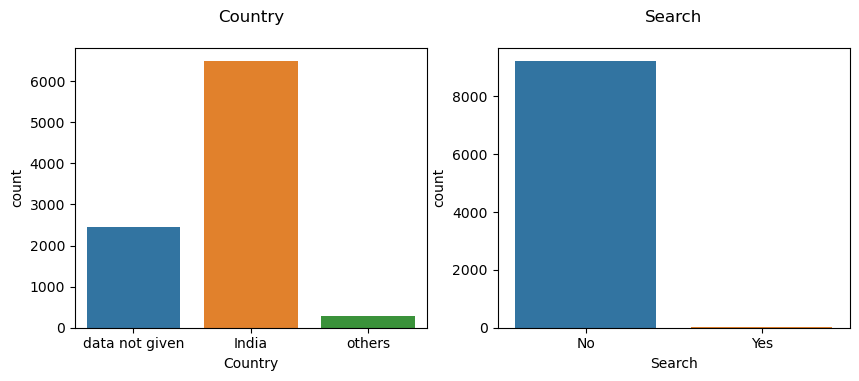

In [42]:
# ploting count plot to analyse :
plt.figure(figsize = (10, 8))
plt.subplot(2,2,1)
sns.countplot(df['Country'])
plt.title('Country\n')

plt.subplot(2,2,2)
sns.countplot(df['Search'])
plt.title('Search\n')

plt.show()

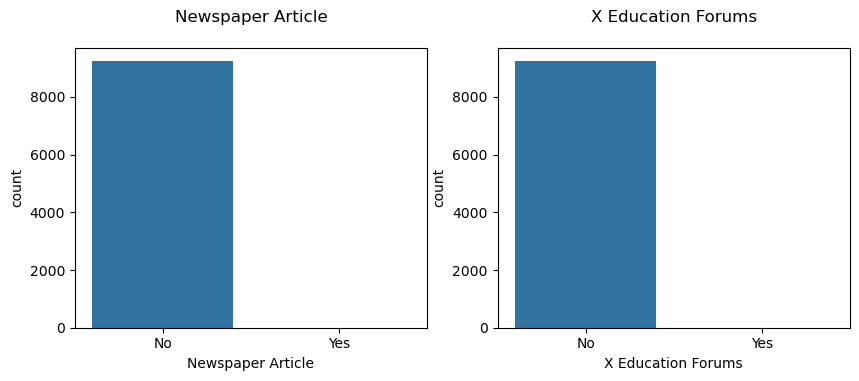

In [43]:
# ploting count plot to analyse :
plt.figure(figsize = (10, 8))
plt.subplot(2,2,1)
sns.countplot(df['Newspaper Article'])
plt.title('Newspaper Article\n')

plt.subplot(2,2,2)
sns.countplot(df['X Education Forums'])
plt.title('X Education Forums\n')

plt.show()

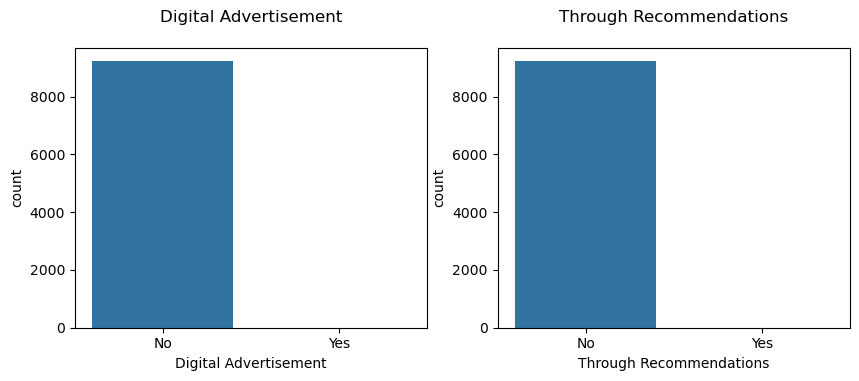

In [44]:
# ploting count plot to analyse :

plt.figure(figsize = (10, 8))
plt.subplot(2,2,1)
sns.countplot(df['Digital Advertisement'])
plt.title('Digital Advertisement\n')

plt.subplot(2,2,2)
sns.countplot(df['Through Recommendations'])
plt.title('Through Recommendations\n')

plt.show()

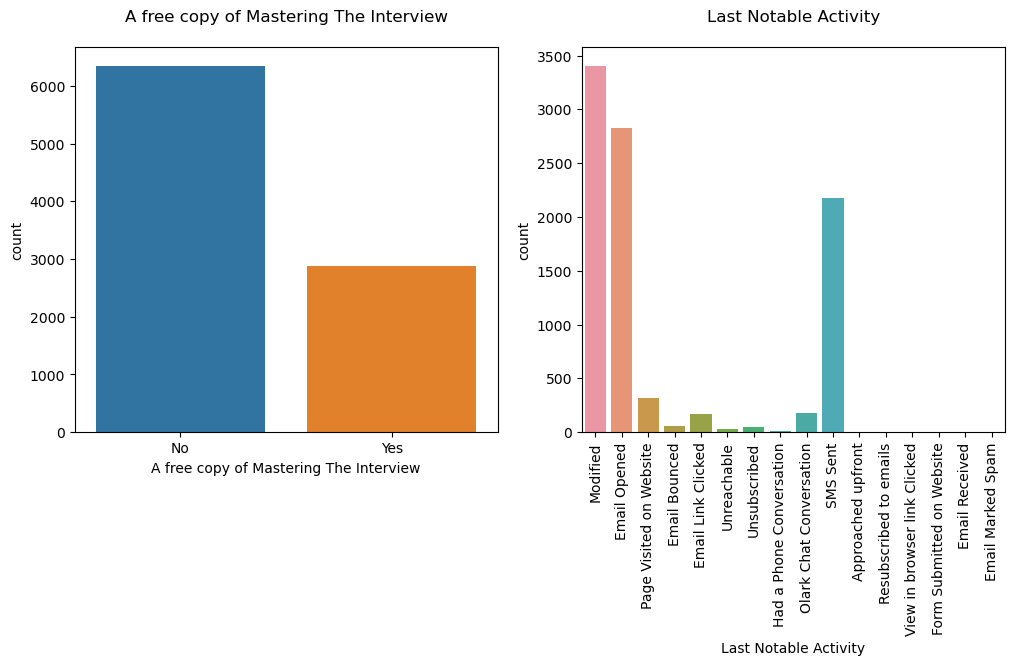

In [45]:
# ploting count plot to analyse :
plt.figure(figsize = (12, 11))
plt.subplot(2,2,1)
sns.countplot(df['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview\n')

plt.subplot(2,2,2)
sns.countplot(df['Last Notable Activity'])
plt.xticks(rotation = 90)
plt.title('Last Notable Activity\n')

plt.show()

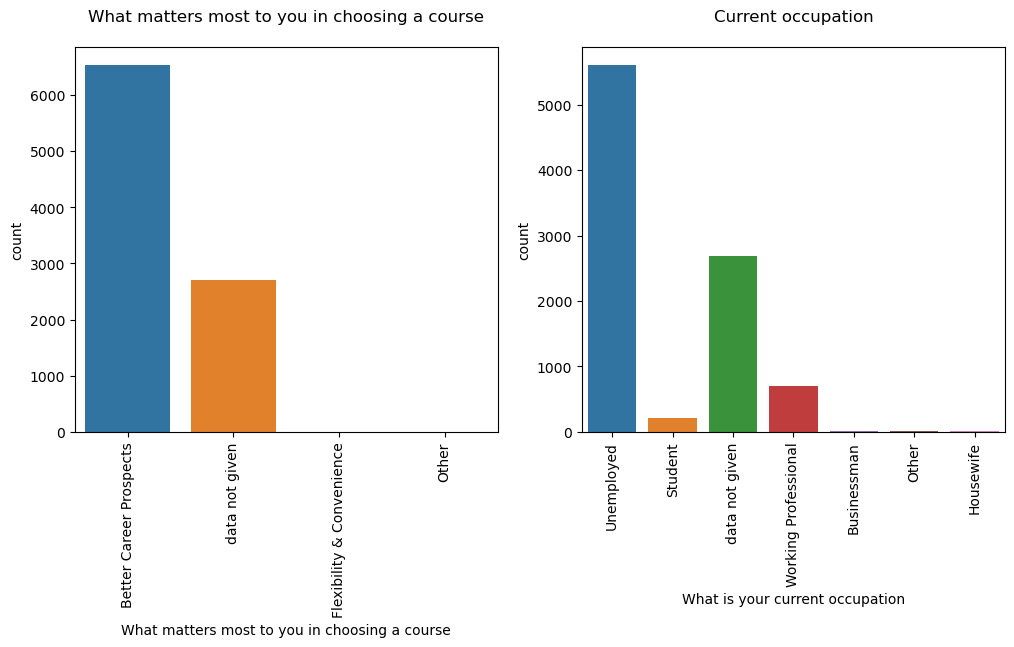

In [46]:
# ploting count plot to analyse :
plt.figure(figsize = (12, 11))
plt.subplot(2,2,1)
sns.countplot(df['What matters most to you in choosing a course'])
plt.xticks(rotation = 90)
plt.title('What matters most to you in choosing a course\n')

plt.subplot(2,2,2)
sns.countplot(df['What is your current occupation'])
plt.xticks(rotation = 90)
plt.title('Current occupation\n')

plt.show()

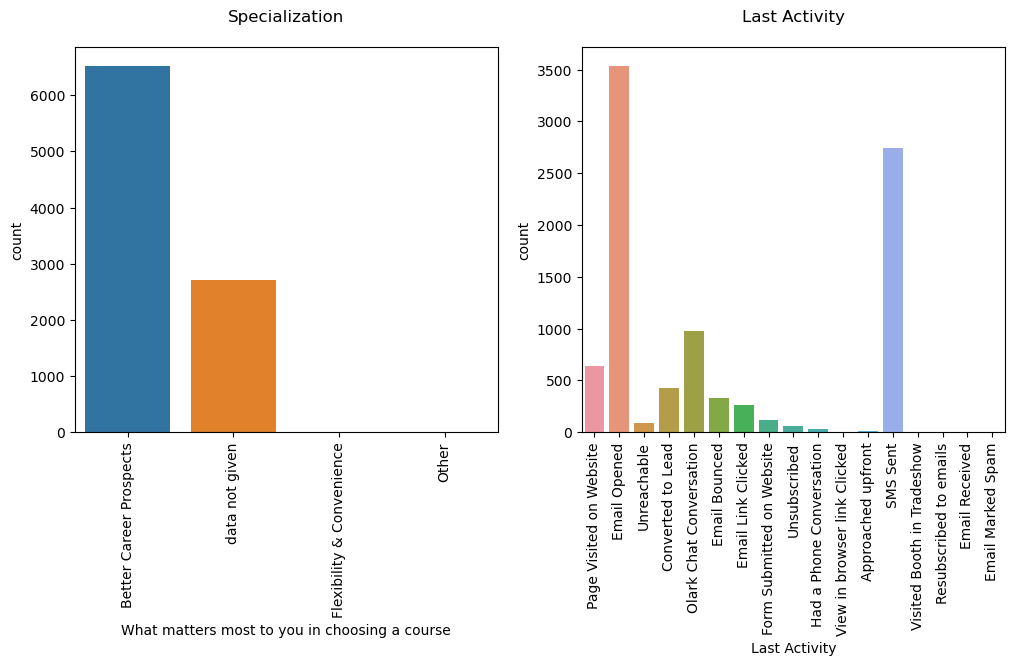

In [47]:
# ploting count plot to analyse :
plt.figure(figsize = (12, 11))
plt.subplot(2,2,1)
sns.countplot(df['What matters most to you in choosing a course'])
plt.xticks(rotation = 90)
plt.title('Specialization\n')

plt.subplot(2,2,2)
sns.countplot(df['Last Activity'])
plt.xticks(rotation = 90)
plt.title('Last Activity\n')

plt.show()

## Bivariate analysis w.r.t. target column Converted !!!
.tick_params(axis='x', rotation = 90)

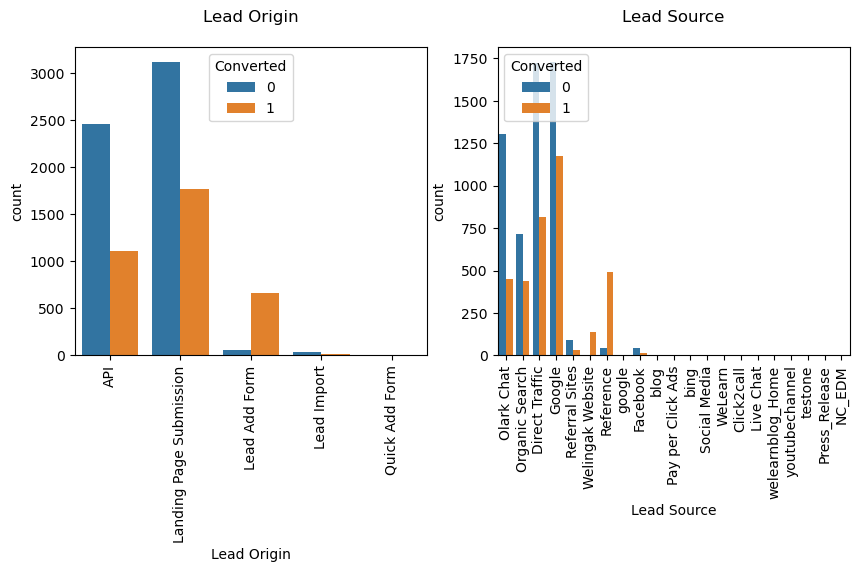

In [48]:
# ploting count plot to analyse :
plt.figure(figsize = (10, 4))
plt.subplot(1,2,1)
sns.countplot(data = df, x='Lead Origin', hue='Converted')
plt.xticks(rotation = 90)
plt.title('Lead Origin\n ')

plt.subplot(1,2,2)
sns.countplot(data = df, x='Lead Source', hue='Converted')
plt.xticks(rotation = 90)
plt.title('Lead Source\n')

plt.show()


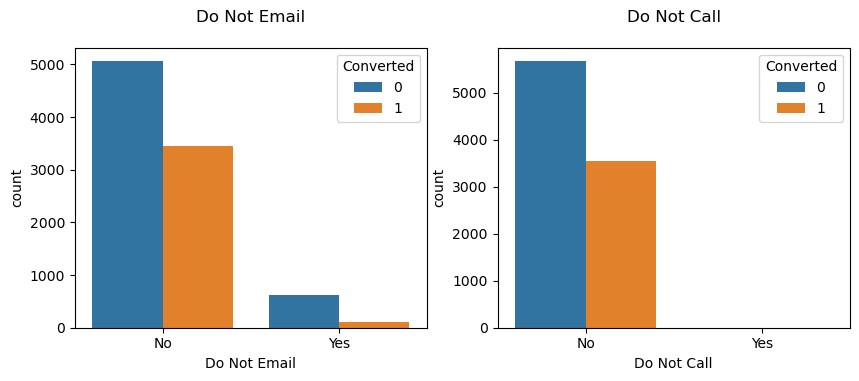

In [49]:
# ploting count plot to analyse :
plt.figure(figsize = (10, 8))
plt.subplot(2,2,1)
sns.countplot(data = df, x = 'Do Not Email', hue = 'Converted')
plt.title('Do Not Email\n')

plt.subplot(2,2,2)
sns.countplot(data = df, x = 'Do Not Call', hue = 'Converted')
plt.title('Do Not Call\n')

plt.show()

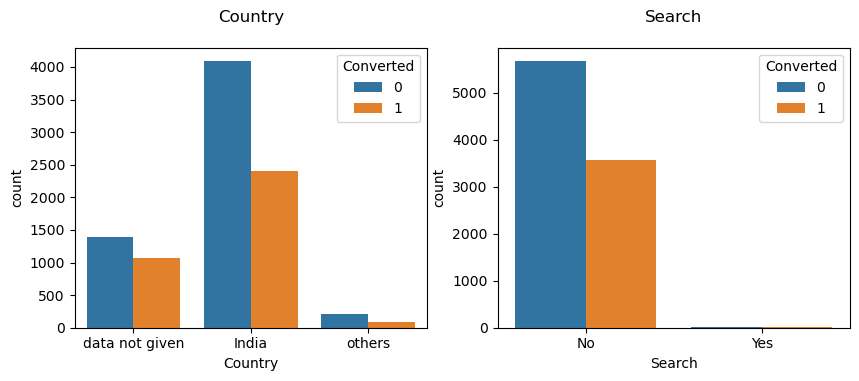

In [50]:
# ploting count plot to analyse :
plt.figure(figsize = (10, 8))
plt.subplot(2,2,1)
sns.countplot(data = df, x = 'Country', hue = 'Converted')
plt.title('Country\n')

plt.subplot(2,2,2)
sns.countplot(data = df, x = 'Search', hue = 'Converted')
plt.title('Search\n')

plt.show()

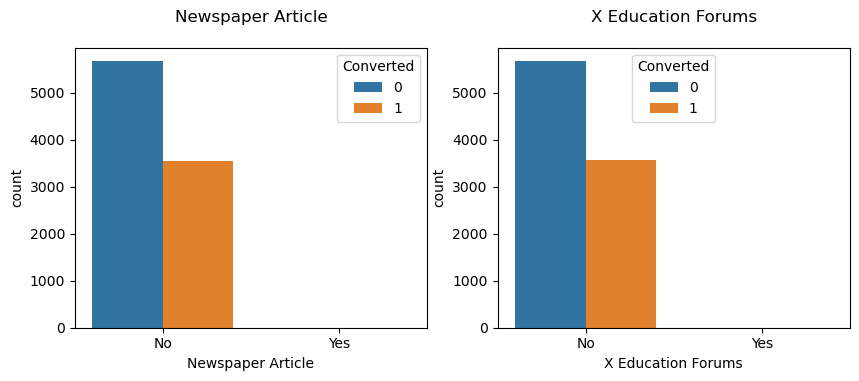

In [51]:
# ploting count plot to analyse :
plt.figure(figsize = (10, 8))
plt.subplot(2,2,1)
sns.countplot(data = df, x = 'Newspaper Article', hue = 'Converted')
plt.title('Newspaper Article\n')

plt.subplot(2,2,2)
sns.countplot(data = df, x = 'X Education Forums', hue = 'Converted')
plt.title('X Education Forums\n')

plt.show()

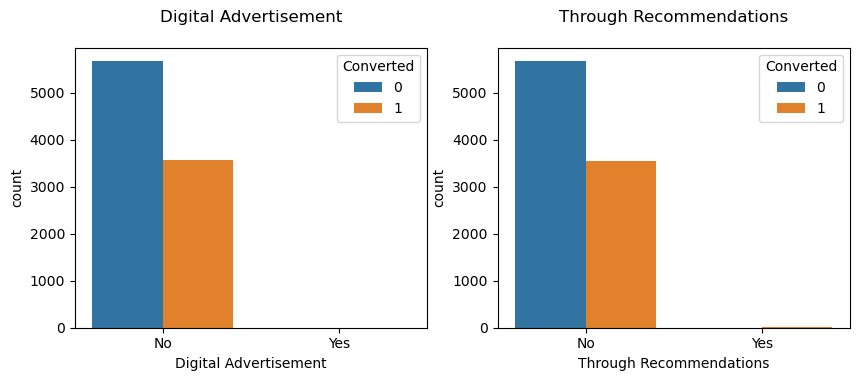

In [52]:
# ploting count plot to analyse :
plt.figure(figsize = (10, 8))
plt.subplot(2,2,1)
sns.countplot(data = df, x = 'Digital Advertisement', hue = 'Converted')
plt.title('Digital Advertisement\n')

plt.subplot(2,2,2)
sns.countplot(data = df, x = 'Through Recommendations', hue = 'Converted')
plt.title('Through Recommendations\n')

plt.show()

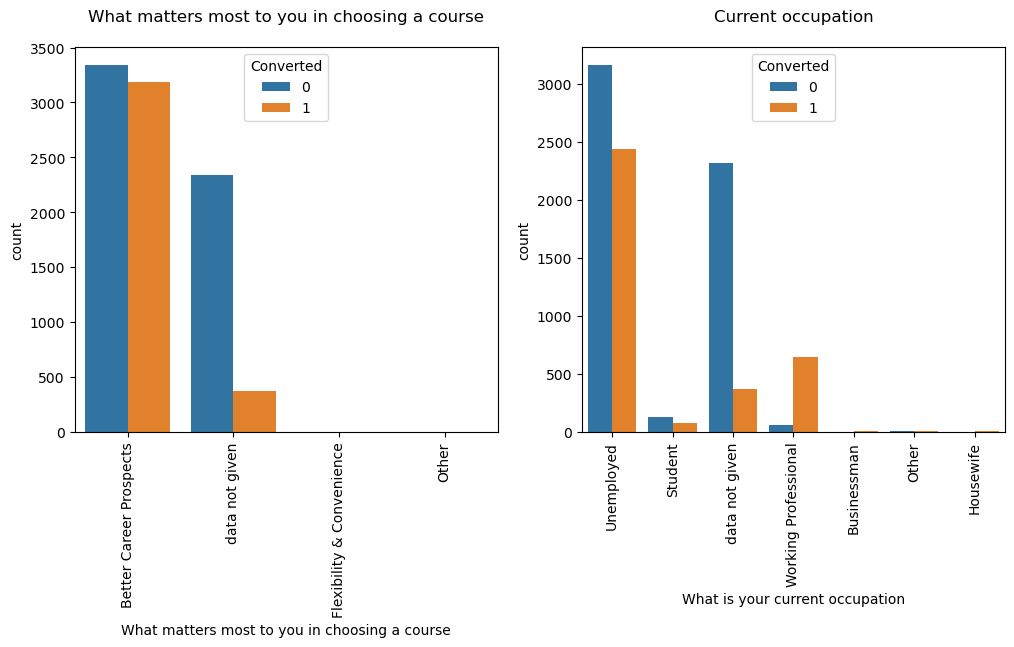

In [53]:
# ploting count plot to analyse :
plt.figure(figsize = (12, 11))
plt.subplot(2,2,1)
sns.countplot(data = df, x = 'What matters most to you in choosing a course', hue = 'Converted')
plt.xticks(rotation = 90)
plt.title('What matters most to you in choosing a course\n')

plt.subplot(2,2,2)
sns.countplot(data= df, x = 'What is your current occupation', hue = 'Converted')
plt.xticks(rotation = 90)
plt.title('Current occupation\n')

plt.show()

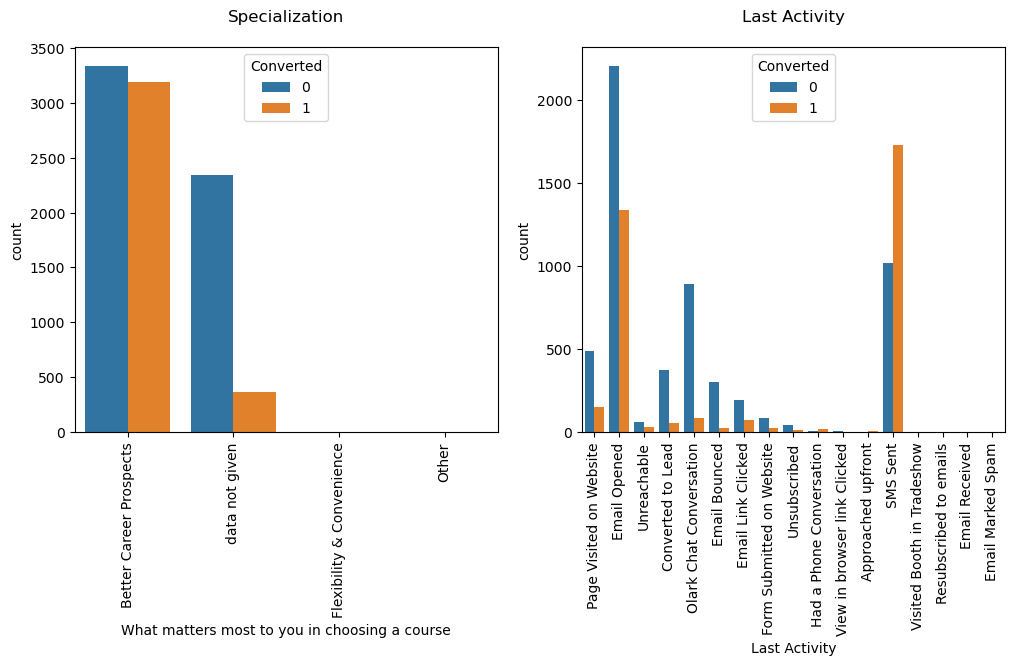

In [54]:
# ploting count plot to analyse :
plt.figure(figsize = (12, 11))
plt.subplot(2,2,1)
sns.countplot(data = df, x = 'What matters most to you in choosing a course', hue = 'Converted')
plt.xticks(rotation = 90)
plt.title('Specialization\n')

plt.subplot(2,2,2)
sns.countplot(data = df, x = 'Last Activity', hue = 'Converted')
plt.xticks(rotation = 90)
plt.title('Last Activity\n')

plt.show()

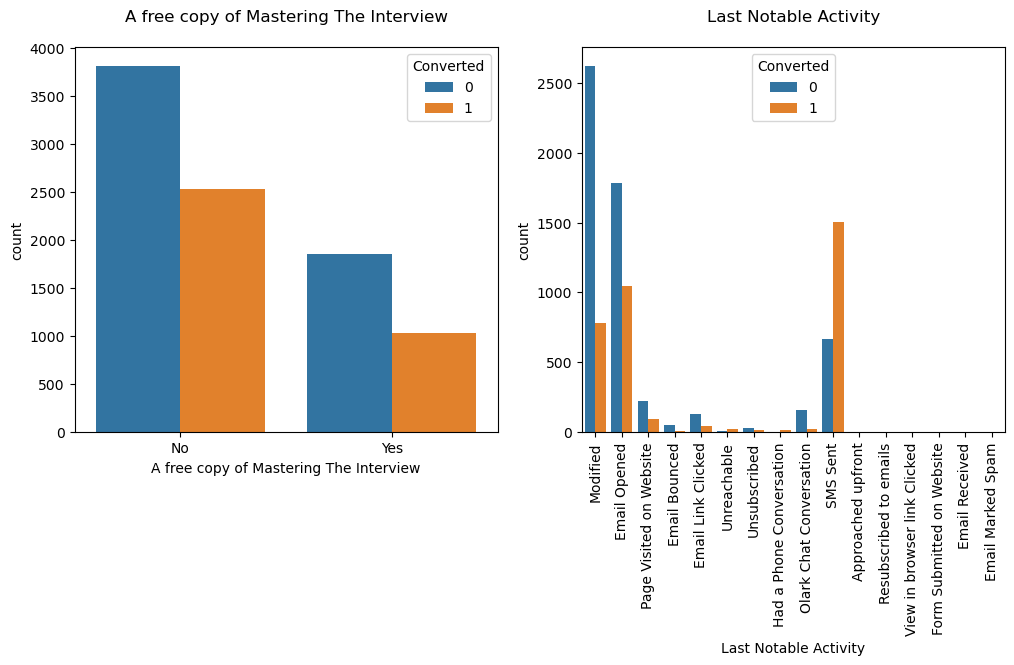

In [55]:
# ploting count plot to analyse :
plt.figure(figsize = (12, 11))
plt.subplot(2,2,1)
sns.countplot(data = df, x = 'A free copy of Mastering The Interview', hue = 'Converted')
plt.title('A free copy of Mastering The Interview\n')

plt.subplot(2,2,2)
sns.countplot(data = df, x = 'Last Notable Activity', hue = 'Converted')
plt.xticks(rotation = 90)
plt.title('Last Notable Activity\n')

plt.show()

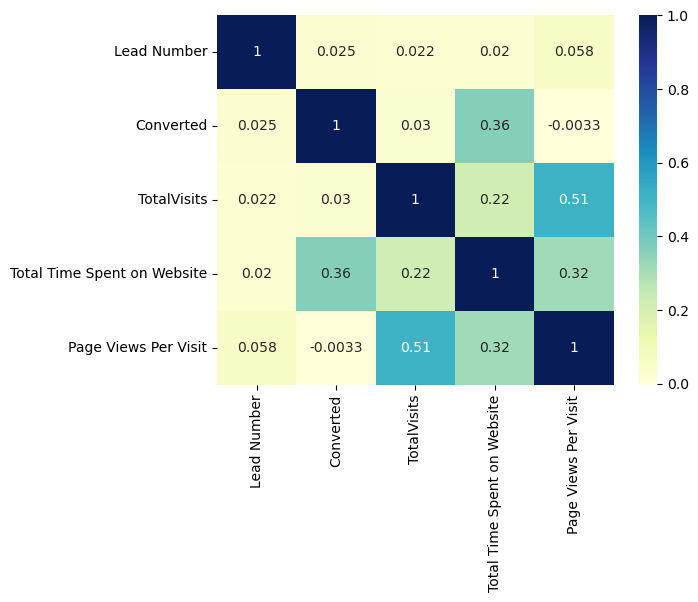

In [56]:
# see the correlation between columns !!
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [57]:
df.nunique()

Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        42
Total Time Spent on Website                      1731
Page Views Per Visit                              115
Last Activity                                      17
Country                                             3
Specialization                                     19
What is your current occupation                     7
What matters most to you in choosing a course       4
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

In [58]:
# creating dummy variavbles and droping first columns !!
dummy_vars = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 'What is your current occupation', 'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first = True)

In [59]:
# add dummy variables to data set !!!
df = pd.concat([df, dummy_vars], axis = 1)
df.shape

(9240, 104)

In [60]:
df = df.drop(['Tags', 'What is your current occupation_data not given', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'Specialization_data not given', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], axis = 1)

# Data preparation for modelling !!!

In [61]:
import sklearn
from sklearn.model_selection import train_test_split

In [62]:
y = df['Converted']
X = df.drop(['Converted'], axis = 1)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

In [64]:
# scalling of data
from sklearn.preprocessing import MinMaxScaler

In [65]:
scaler = MinMaxScaler()

In [66]:
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [67]:
X.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,2.0,1532,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,1.0,305,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,2.0,1428,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# Model Building !!!

In [68]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [69]:
from sklearn.feature_selection import RFE

rfe = RFE(logreg, n_features_to_select = 15)

In [70]:
rfe = RFE(logreg, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [71]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', True, 1),
 ('TotalVisits', False, 58),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 25),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 27),
 ('Lead Origin_Quick Add Form', False, 51),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 26),
 ('Lead Source_Google', False, 40),
 ('Lead Source_Live Chat', False, 46),
 ('Lead Source_NC_EDM', False, 55),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 8),
 ('Lead Source_Pay per Click Ads', False, 62),
 ('Lead Source_Press_Release', False, 49),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 19),
 ('Lead Source_Social Media', False, 67),
 ('Lead Source_WeLearn', False, 50),
 ('Lead Source_Welingak Website', False, 7),
 ('Lead Source_bing', False, 66),
 ('Lead Source_blog', False, 64),
 ('Lead Source_google', False, 45),
 ('Lead Source_

In [72]:
var_cols = X_train.columns[rfe.support_]

In [73]:
X_train = X_train[var_cols]

In [74]:
X_train_sm = sm.add_constant(X_train)
m1 = sm.GLM(y_train, X_train_sm)
res = m1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Gaussian   Df Model:                           15
Link Function:               identity   Scale:                         0.13764
Method:                          IRLS   Log-Likelihood:                -2756.2
Date:                Tue, 15 Nov 2022   Deviance:                       888.03
Time:                        18:58:39   Pearson chi2:                     888.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.5115
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6235      0.130     -4.790      0.000      -0.879      -0.368
Lead Number                                           1.224e-06   2.07e-07      5.925      0.000    8.19e-07    1.63e-06
Total Time Spent on Website                              0.7715      0.021     35.923      0.000       0.729       0.814
Lead Origin_Landing Page Submission                     -0.0149      0.014     -1.060      0.289      -0.042       0.013
Lead Origin_Lead Add Form                                0.6498      0.035     18.382      0.000       0.581       0.719
Lead Source_Direct Traffic                              -0.0345      0.014     -2.535      0.011      -0.061      -0.008
Lead Source_Olark Chat                                   0.1451      0.016      8.842      0.000       0.113       0.177
Lead Source_Reference                                   -0.1335      0.039     -3.444      0.001      -0.210      -0.058
Do Not Email_Yes                                        -0.1331      0.018     -7.441      0.000      -0.168      -0.098
Last Activity_Converted to Lead                         -0.0766      0.025     -3.126      0.002      -0.125      -0.029
Last Activity_Olark Chat Conversation                   -0.1293      0.019     -6.929      0.000      -0.166      -0.093
Last Activity_SMS Sent                                   0.0986      0.021      4.625      0.000       0.057       0.140
What is your current occupation_Working Professional     0.3486      0.018     19.292      0.000       0.313       0.384
A free copy of Mastering The Interview_Yes              -0.0089      0.013     -0.663      0.508      -0.035       0.017
Last Notable Activity_Modified                          -0.0838      0.013     -6.506      0.000      -0.109      -0.059
Last Notable Activity_SMS Sent                           0.1481      0.024      6.060      0.000       0.100       0.196
========================================================================================================================
"""

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Number,7.82
14,Last Notable Activity_SMS Sent,6.61
10,Last Activity_SMS Sent,6.42
2,Lead Origin_Landing Page Submission,4.84
3,Lead Origin_Lead Add Form,4.66
6,Lead Source_Reference,4.26
13,Last Notable Activity_Modified,2.87
12,A free copy of Mastering The Interview_Yes,2.62
4,Lead Source_Direct Traffic,2.35
5,Lead Source_Olark Chat,2.31


In [77]:
X_train.drop('A free copy of Mastering The Interview_Yes', axis = 1, inplace = True)

In [78]:
X_train_sm = sm.add_constant(X_train)
m2 = sm.GLM(y_train, X_train_sm)
res = m2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Gaussian   Df Model:                           14
Link Function:               identity   Scale:                         0.13762
Method:                          IRLS   Log-Likelihood:                -2756.4
Date:                Tue, 15 Nov 2022   Deviance:                       888.09
Time:                        18:58:40   Pearson chi2:                     888.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.5115
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6263      0.130     -4.814      0.000      -0.881      -0.371
Lead Number                                           1.228e-06   2.06e-07      5.948      0.000    8.23e-07    1.63e-06
Total Time Spent on Website                              0.7713      0.021     35.919      0.000       0.729       0.813
Lead Origin_Landing Page Submission                     -0.0178      0.013     -1.331      0.183      -0.044       0.008
Lead Origin_Lead Add Form                                0.6499      0.035     18.383      0.000       0.581       0.719
Lead Source_Direct Traffic                              -0.0383      0.012     -3.106      0.002      -0.063      -0.014
Lead Source_Olark Chat                                   0.1449      0.016      8.831      0.000       0.113       0.177
Lead Source_Reference                                   -0.1337      0.039     -3.449      0.001      -0.210      -0.058
Do Not Email_Yes                                        -0.1329      0.018     -7.430      0.000      -0.168      -0.098
Last Activity_Converted to Lead                         -0.0766      0.025     -3.127      0.002      -0.125      -0.029
Last Activity_Olark Chat Conversation                   -0.1292      0.019     -6.922      0.000      -0.166      -0.093
Last Activity_SMS Sent                                   0.0986      0.021      4.622      0.000       0.057       0.140
What is your current occupation_Working Professional     0.3485      0.018     19.290      0.000       0.313       0.384
Last Notable Activity_Modified                          -0.0836      0.013     -6.493      0.000      -0.109      -0.058
Last Notable Activity_SMS Sent                           0.1484      0.024      6.071      0.000       0.100       0.196
========================================================================================================================
"""

In [79]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Number,7.81
13,Last Notable Activity_SMS Sent,6.61
10,Last Activity_SMS Sent,6.42
3,Lead Origin_Lead Add Form,4.66
2,Lead Origin_Landing Page Submission,4.36
6,Lead Source_Reference,4.26
12,Last Notable Activity_Modified,2.87
5,Lead Source_Olark Chat,2.31
1,Total Time Spent on Website,2.24
4,Lead Source_Direct Traffic,1.92


In [80]:
X_train.drop('Lead Origin_Landing Page Submission', axis =1, inplace = True)

In [81]:
X_train_sm = sm.add_constant(X_train)
m3 = sm.GLM(y_train, X_train_sm)
res = m3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Gaussian   Df Model:                           13
Link Function:               identity   Scale:                         0.13764
Method:                          IRLS   Log-Likelihood:                -2757.3
Date:                Tue, 15 Nov 2022   Deviance:                       888.34
Time:                        18:58:40   Pearson chi2:                     888.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.5113
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6494      0.129     -5.037      0.000      -0.902      -0.397
Lead Number                                           1.249e-06   2.06e-07      6.064      0.000    8.45e-07    1.65e-06
Total Time Spent on Website                              0.7709      0.021     35.902      0.000       0.729       0.813
Lead Origin_Lead Add Form                                0.6603      0.034     19.159      0.000       0.593       0.728
Lead Source_Direct Traffic                              -0.0447      0.011     -3.929      0.000      -0.067      -0.022
Lead Source_Olark Chat                                   0.1545      0.015     10.486      0.000       0.126       0.183
Lead Source_Reference                                   -0.1335      0.039     -3.443      0.001      -0.209      -0.058
Do Not Email_Yes                                        -0.1335      0.018     -7.466      0.000      -0.169      -0.098
Last Activity_Converted to Lead                         -0.0750      0.024     -3.064      0.002      -0.123      -0.027
Last Activity_Olark Chat Conversation                   -0.1265      0.019     -6.818      0.000      -0.163      -0.090
Last Activity_SMS Sent                                   0.0980      0.021      4.598      0.000       0.056       0.140
What is your current occupation_Working Professional     0.3481      0.018     19.267      0.000       0.313       0.383
Last Notable Activity_Modified                          -0.0835      0.013     -6.485      0.000      -0.109      -0.058
Last Notable Activity_SMS Sent                           0.1486      0.024      6.082      0.000       0.101       0.197
========================================================================================================================
"""

In [82]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Notable Activity_SMS Sent,6.61
9,Last Activity_SMS Sent,6.41
0,Lead Number,5.17
2,Lead Origin_Lead Add Form,4.44
5,Lead Source_Reference,4.26
11,Last Notable Activity_Modified,2.87
1,Total Time Spent on Website,2.23
4,Lead Source_Olark Chat,1.89
8,Last Activity_Olark Chat Conversation,1.65
3,Lead Source_Direct Traffic,1.59


In [83]:
X_train.drop('Lead Number', axis = 1, inplace = True)

In [84]:
X_train_sm = sm.add_constant(X_train)
m4 = sm.GLM(y_train, X_train_sm)
res = m4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Gaussian   Df Model:                           12
Link Function:               identity   Scale:                         0.13840
Method:                          IRLS   Log-Likelihood:                -2775.7
Date:                Tue, 15 Nov 2022   Deviance:                       893.40
Time:                        18:58:40   Pearson chi2:                     893.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.5066
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1298      0.011     12.164      0.000       0.109       0.151
Total Time Spent on Website                              0.7729      0.022     35.904      0.000       0.731       0.815
Lead Origin_Lead Add Form                                0.6645      0.035     19.230      0.000       0.597       0.732
Lead Source_Direct Traffic                              -0.0554      0.011     -4.916      0.000      -0.078      -0.033
Lead Source_Olark Chat                                   0.1435      0.015      9.790      0.000       0.115       0.172
Lead Source_Reference                                   -0.1373      0.039     -3.532      0.000      -0.213      -0.061
Do Not Email_Yes                                        -0.1445      0.018     -8.101      0.000      -0.179      -0.110
Last Activity_Converted to Lead                         -0.0801      0.025     -3.265      0.001      -0.128      -0.032
Last Activity_Olark Chat Conversation                   -0.1289      0.019     -6.925      0.000      -0.165      -0.092
Last Activity_SMS Sent                                   0.0960      0.021      4.489      0.000       0.054       0.138
What is your current occupation_Working Professional     0.3471      0.018     19.160      0.000       0.312       0.383
Last Notable Activity_Modified                          -0.0818      0.013     -6.336      0.000      -0.107      -0.056
Last Notable Activity_SMS Sent                           0.1373      0.024      5.619      0.000       0.089       0.185
========================================================================================================================
"""

In [85]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Notable Activity_SMS Sent,6.48
8,Last Activity_SMS Sent,6.41
1,Lead Origin_Lead Add Form,4.30
4,Lead Source_Reference,4.26
10,Last Notable Activity_Modified,2.52
7,Last Activity_Olark Chat Conversation,1.65
0,Total Time Spent on Website,1.59
3,Lead Source_Olark Chat,1.46
2,Lead Source_Direct Traffic,1.35
6,Last Activity_Converted to Lead,1.29


In [86]:
X_train.drop('Last Notable Activity_SMS Sent', axis = 1, inplace = True)

In [87]:
X_train_sm = sm.add_constant(X_train)
m5 = sm.GLM(y_train, X_train_sm)
res = m5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Gaussian   Df Model:                           11
Link Function:               identity   Scale:                         0.13906
Method:                          IRLS   Log-Likelihood:                -2791.5
Date:                Tue, 15 Nov 2022   Deviance:                       897.77
Time:                        18:58:41   Pearson chi2:                     898.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.5026
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1387      0.011     13.112      0.000       0.118       0.159
Total Time Spent on Website                              0.7788      0.022     36.130      0.000       0.737       0.821
Lead Origin_Lead Add Form                                0.6695      0.035     19.335      0.000       0.602       0.737
Lead Source_Direct Traffic                              -0.0553      0.011     -4.891      0.000      -0.077      -0.033
Lead Source_Olark Chat                                   0.1458      0.015      9.926      0.000       0.117       0.175
Lead Source_Reference                                   -0.1380      0.039     -3.542      0.000      -0.214      -0.062
Do Not Email_Yes                                        -0.1359      0.018     -7.630      0.000      -0.171      -0.101
Last Activity_Converted to Lead                         -0.0525      0.024     -2.180      0.029      -0.100      -0.005
Last Activity_Olark Chat Conversation                   -0.1091      0.018     -5.959      0.000      -0.145      -0.073
Last Activity_SMS Sent                                   0.2000      0.011     18.667      0.000       0.179       0.221
What is your current occupation_Working Professional     0.3521      0.018     19.412      0.000       0.317       0.388
Last Notable Activity_Modified                          -0.1197      0.011    -10.852      0.000      -0.141      -0.098
========================================================================================================================
"""

In [88]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,4.29
4,Lead Source_Reference,4.26
10,Last Notable Activity_Modified,1.87
7,Last Activity_Olark Chat Conversation,1.58
0,Total Time Spent on Website,1.55
3,Lead Source_Olark Chat,1.44
8,Last Activity_SMS Sent,1.42
2,Lead Source_Direct Traffic,1.34
6,Last Activity_Converted to Lead,1.23
9,What is your current occupation_Working Profes...,1.18


## Creating prediction !!!

In [89]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.284489
6795    0.250324
3516    0.320822
8105    0.760248
3934    0.164762
4844    1.150275
3297    0.167797
8071    1.019330
987     0.245774
7423    0.874388
dtype: float64

In [90]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.28448896, 0.25032376, 0.32082178, 0.76024831, 0.16476243,
       1.15027502, 0.1677973 , 1.01932954, 0.24577445, 0.87438821])

In [91]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.284489
1,0,0.250324
2,0,0.320822
3,0,0.760248
4,0,0.164762


In [92]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.284489,0
1,0,0.250324,0
2,0,0.320822,0
3,0,0.760248,1
4,0,0.164762,0


## Model Evaluation !!!

In [93]:
from sklearn import metrics

In [94]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3587,  415],
       [ 870, 1596]], dtype=int64)

In [95]:
# check overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)*100

80.13296227581942

## Acurracy is about 80.2% of model which seems good !!!

In [96]:
# Substituting the value of true positive
tp = confusion[1,1]
# Substituting the value of true negatives
tn = confusion[0,0]
# Substituting the value of false positives
fp = confusion[0,1] 
# Substituting the value of false negatives
fn = confusion[1,0]

# Calculation of the sensitivity !!!

In [97]:
tp/(tp+fn) *100

64.72019464720195

# Calculation of the specificity

In [98]:
tn/(tn+fp)*100

89.63018490754622

## cut off = 0.5, accuracy around = 80.2%, sensitivity around = 64.8% and specificity around = 89.7%

## ROC Curve

#### cut off = 0.5 selected randomly 

In [99]:
def curve_roc( actual, probs ):
    thresholds, fpr, tpr = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [100]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

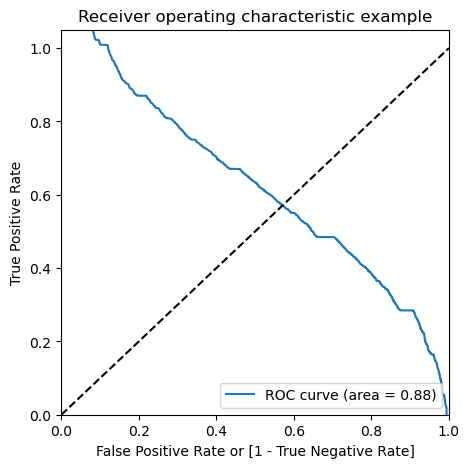

In [101]:
curve_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

## ROC curve covers area of total area 0.88 

In [102]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.284489,0,1,1,1,0,0,0,0,0,0,0
1,0,0.250324,0,1,1,1,0,0,0,0,0,0,0
2,0,0.320822,0,1,1,1,1,0,0,0,0,0,0
3,0,0.760248,1,1,1,1,1,1,1,1,1,0,0
4,0,0.164762,0,1,1,0,0,0,0,0,0,0,0


In [103]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.434137,0.993917,0.089205
0.1,0.1,0.564471,0.977697,0.309845
0.2,0.2,0.688312,0.939578,0.533483
0.3,0.3,0.784168,0.862936,0.735632
0.4,0.4,0.814007,0.785888,0.831334
0.5,0.5,0.801330,0.647202,0.896302
0.6,0.6,0.785250,0.537713,0.937781
0.7,0.7,0.752010,0.401054,0.968266
0.8,0.8,0.719233,0.289538,0.984008
0.9,0.9,0.681818,0.173155,0.995252


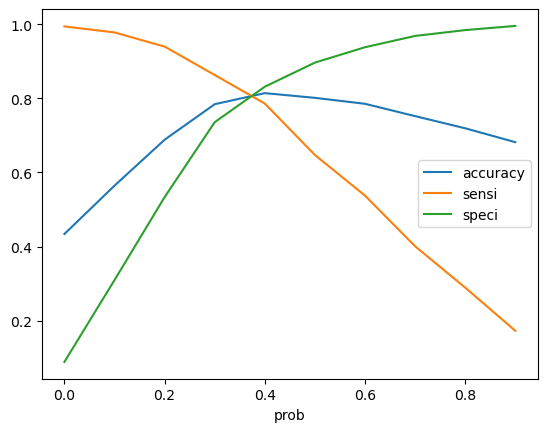

In [104]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### we can see optimal cut off is about 0.39

In [105]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.39 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.284489,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.250324,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.320822,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.760248,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.164762,0,1,1,0,0,0,0,0,0,0,0,0


In [106]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted) * 100

81.18429189857761

In [107]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3291,  711],
       [ 506, 1960]], dtype=int64)

In [108]:
tp = confusion[1,1]
#true negatives
tn = confusion[0,0]
#false positives
fp = confusion[0,1] 
#false negatives
fn = confusion[1,0]

# sensitivity


In [109]:
tp/(tp+fn)*100

79.48094079480941

# specificity


In [110]:
tn/(tn+fp)*100

82.23388305847077

## With the current cut off as 0.39 we have accuracy  81.2%, sensitivity = 79.5 and specificity of around 82.3 %

## Prediction on test set !!!

In [111]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])


In [112]:
var_col = X_train.columns

In [113]:
X_test = X_test[var_col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[var_col])

In [114]:
y_test_pred = res.predict(X_test_sm)
y_pred_df = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test) 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.629919
1,1,0.870103
2,1,0.510945
3,0,0.055621
4,1,0.670115


In [115]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.39 else 0)


##### checking over all accuracy for test set

In [116]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)*100

81.74603174603175

In [117]:
confusion = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion

array([[1396,  281],
       [ 225,  870]], dtype=int64)

In [118]:
#true positive
tp = confusion[1,1]
#true negatives
tn = confusion[0,0]
#false positives
fp = confusion[0,1] 
#false negatives
fn = confusion[1,0]

# sensitivity


In [119]:
tp/(tp+fn)*100

79.45205479452055

# specificity


In [120]:
tn/(tn+fp)*100

83.24388789505068

## With the current cut off as 0.39 we have accuracy = 81.8% , sensitivity =79.45%  and specificity of around 83.3%.

## Precision-Recall

In [121]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3587,  415],
       [ 870, 1596]], dtype=int64)

### Precision = tp/tp+fp

In [122]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])*100

79.36350074589757

## Recall = tp/tp+fn

In [123]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])* 100

64.72019464720195

## cut off = 0.39, Precision = 79.4 % and Recall = 64.8%

In [124]:
from sklearn.metrics import precision_recall_curve

In [125]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

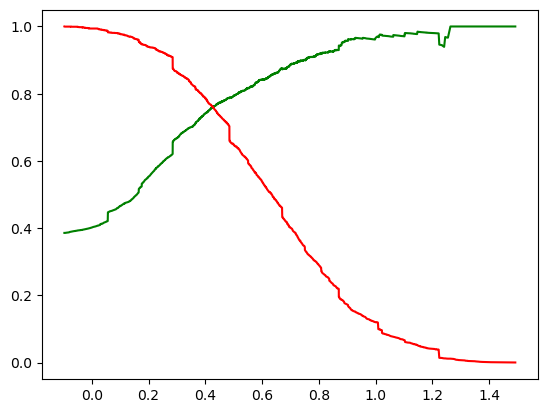

In [126]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [127]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.284489,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.250324,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.320822,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.760248,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.164762,0,1,1,0,0,0,0,0,0,0,0,0


## Accuracy

In [128]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)*100

81.69449598021026

In [129]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3396,  606],
       [ 578, 1888]], dtype=int64)

In [130]:
#true positive
tp = confusion[1,1]
#true negatives
tm = confusion[0,0]
#false positives
fp = confusion[0,1] 
#false negatives
fn = confusion[1,0]

# Precision = tp/tp+fp

In [131]:
tp/(tp+fp)* 100

75.70168404170008

# Recall = tp/tp+fn

In [132]:
tp/(tp+fn)*100

76.56123276561233

## cut off = 0.42, Precision = 75.7% and Recall = 76.6% and accuracy = 81.7 %

#  Prediction on test set

In [133]:
y_test_pred = res.predict(X_test_sm)
y_pred_df = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test) 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.629919
1,1,0.870103
2,1,0.510945
3,0,0.055621
4,1,0.670115


In [134]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [135]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted) * 100

82.53968253968253

In [136]:
confusion = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion

array([[1447,  230],
       [ 254,  841]], dtype=int64)

In [137]:
tp = confusion[1,1]
#true negatives
tn = confusion[0,0]
# false positives
fp = confusion[0,1] 
# false negatives
fn = confusion[1,0]

# Precision = tp/tp+fp

In [138]:
tp/(tp+fp) *100

78.52474323062559

# Recall = tp/tp+fn 

In [139]:
tp/(tp+fn)* 100

76.80365296803653

## cut off = 0.42, Precision = 78.5% and Recall = 76.8% and accuracy= 82.5%

# summary and suggestions !!!

### maximum leads originated from Landing page submission and lead source were Google

### most of people who applied for course are unemployed in occupations.

### Maximum leads converted who landing on page submission

### most of leads  in course  are looking for better career prospects in future

### Maximam leads who serched for course are from india